# Pymaceuticals Inc.
---

The comprehensive analysis of Pymaceuticals Inc.'s study data, involving various drug regimens on mice, has led to several key findings:

### Data Preparation and Integrity
The study initially included data for 249 mice, but due to the presence of duplicate entries for mouse ID g989, the final analysis was conducted on 248 mice.

### Summary Statistics
The study examined multiple drug regimens, with Capomulin and Ramicane showing notably lower mean tumor volumes, suggesting higher effectiveness.

### Data Visualization
Bar charts indicated that Capomulin and Ramicane had the highest number of measurements, implying extensive testing.
Pie charts revealed a near-even distribution between female and male mice in the study.

### Tumor Volume Analysis
The analysis of final tumor volumes in Capomulin, Ramicane, Infubinol, and Ceftamin treatments showed significant results. Infubinol was the only regimen with a potential outlier, indicating variability in its effectiveness.
Box plots of these regimens highlighted the spread and central tendency of tumor volumes, further emphasizing the potential effectiveness of Capomulin and Ramicane.

### Capomulin Regimen Analysis
A line plot for a randomly selected mouse treated with Capomulin showed a decrease in tumor volume over time, indicating the drug's effectiveness.
The scatter plot and linear regression analysis between mouse weight and average tumor volume under the Capomulin regimen revealed a strong positive correlation, suggesting that mouse weight may influence tumor reduction.
Correlation and Regression
The correlation coefficient (0.84) and a high r-squared value (0.71) from the linear regression indicated a strong relationship between mouse weight and tumor volume in the Capomulin regimen.

## Overall Conclusion
The data suggest that Capomulin and Ramicane were more effective in reducing tumor size compared to other treatments. The relationship between mouse weight and tumor volume was particularly pronounced in the Capomulin regimen, which could be a factor in its efficacy.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata,on="Mouse ID", how = "left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mouse_ids = duplicates["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data.loc[combined_data["Mouse ID"]== "g989",:]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_data = clean_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
dr_mean = grouped_data["Tumor Volume (mm3)"].mean()
dr_median = grouped_data["Tumor Volume (mm3)"].median()
dr_var = grouped_data["Tumor Volume (mm3)"].var()
dr_std = grouped_data["Tumor Volume (mm3)"].std()
dr_sem = grouped_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume": dr_mean, 
                              "Median Tumor Volume": dr_median, 
                              "Tumor Volume Variance": dr_var, 
                              "Tumor Volume Std. Dev.": dr_std, 
                              "Tumor Volume Std. Err.": dr_sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method to generate summary statistics
aggregated_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Renaming the columns for clarity
aggregated_stats.columns = [
    'Mean Tumor Volume', 
    'Median Tumor Volume', 
    'Tumor Volume Variance', 
    'Tumor Volume Std. Dev.', 
    'Tumor Volume Std. Err.'
]

aggregated_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

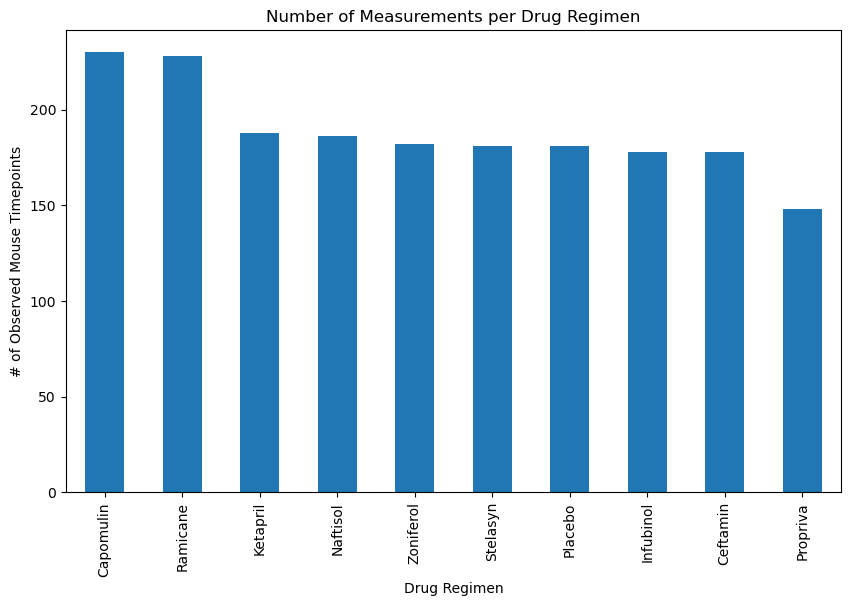

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_per_regimen = clean_data["Drug Regimen"].value_counts()

# Generate a bar plot using Pandas
pandas_bar_plot = count_per_regimen.plot(kind="bar", figsize=(10,6), 
                                         color="#2077B4", 
                                         title="Number of Measurements per Drug Regimen")
pandas_bar_plot.set_xlabel("Drug Regimen")
pandas_bar_plot.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

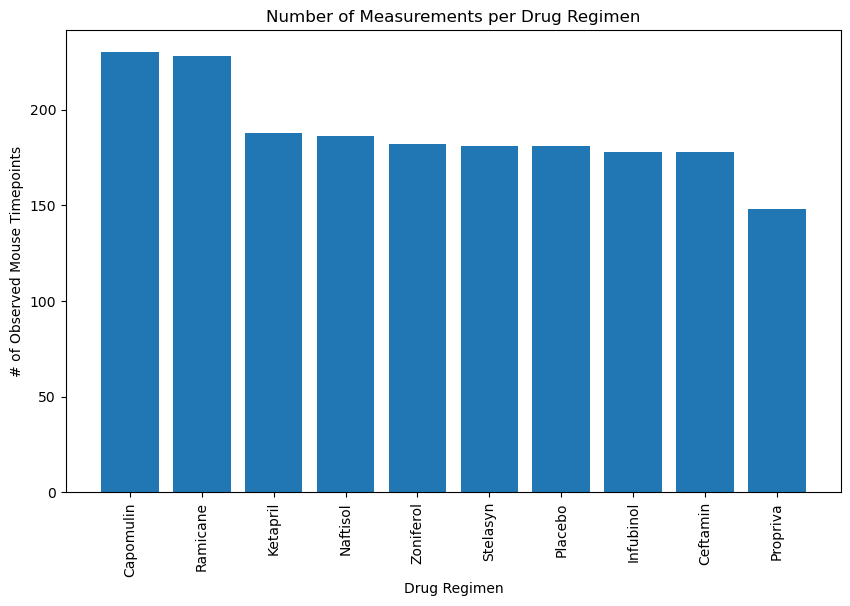

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(count_per_regimen.index, count_per_regimen, color="#2077B4")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Measurements per Drug Regimen")
plt.xticks(rotation=90)
plt.show()

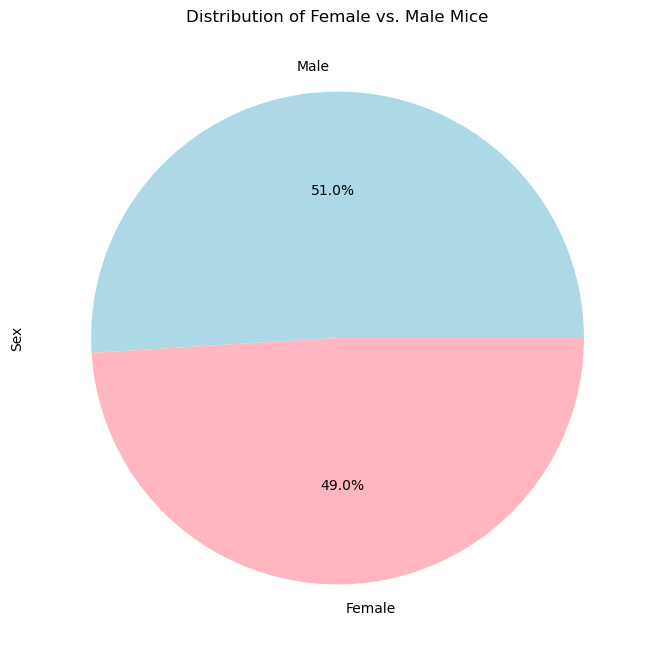

In [11]:
#Distribution of male versus female mice
gender_distribution = clean_data["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie_plot = gender_distribution.plot(kind="pie", 
                                           figsize=(8, 8), 
                                           autopct="%1.1f%%", 
                                           colors=["lightblue", "lightpink"], 
                                           title="Distribution of Female vs. Male Mice")
plt.ylabel("Sex")
plt.show()


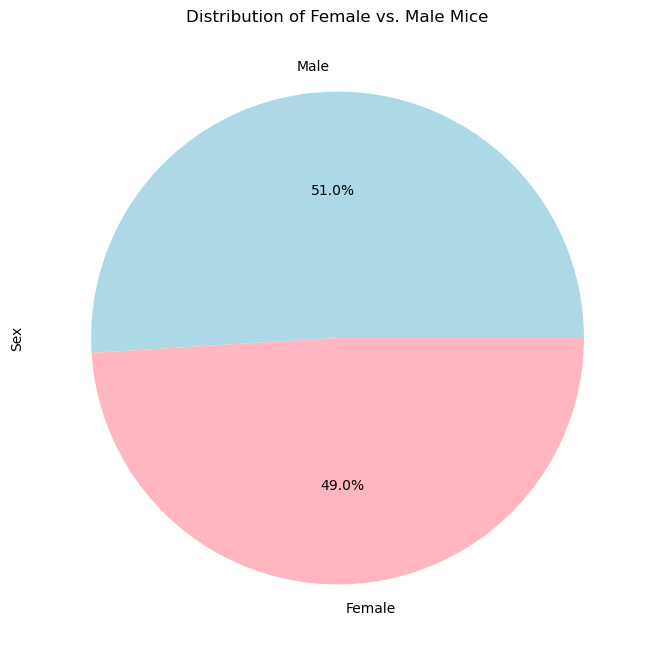

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, 
        labels=gender_distribution.index, 
        autopct="%1.1f%%", 
        colors=["lightblue", "lightpink"])
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")



In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Extracting tumor volumes for the current treatment
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Calculating IQR
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    # Create a dictionary for the current treatment
    treatment_dict = {
        "Treatment": treatment,
        "Tumor Volumes": final_tumor_vol,
        "Lower Quartile": lowerq,
        "Upper Quartile": upperq,
        "IQR": iqr,
        "Outliers": outliers
    }

    # Append the dictionary to the tumor_vol_data list
    tumor_vol_data.append(treatment_dict)

    # Output the IQR data and potential outliers
    print(f"{treatment} IQR data:")
    print(f" - Lower Quartile: {lowerq}")
    print(f" - Upper Quartile: {upperq}")
    print(f" - Interquartile Range: {iqr}")
    print(f" - Median: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")
    print(f"Potential Outliers: {outliers}\n")


Capomulin IQR data:
 - Lower Quartile: 32.37735684
 - Upper Quartile: 40.1592203
 - Interquartile Range: 7.781863460000004
 - Median: 38.1251644 
Values below 20.70456164999999 and above 51.83201549 could be outliers.
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane IQR data:
 - Lower Quartile: 31.56046955
 - Upper Quartile: 40.65900627
 - Interquartile Range: 9.098536719999998
 - Median: 36.56165229 
Values below 17.912664470000003 and above 54.30681135 could be outliers.
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol IQR data:
 - Lower Quartile: 54.04860769
 - Upper Quartile: 65.52574285
 - Interquartile Range: 11.477135160000003
 - Median: 60.16518046 
Values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin IQR data:
 - Lower Quartile: 48.72207785
 - Upper Quartile: 64.29983003
 - Interquartile Range: 15.5

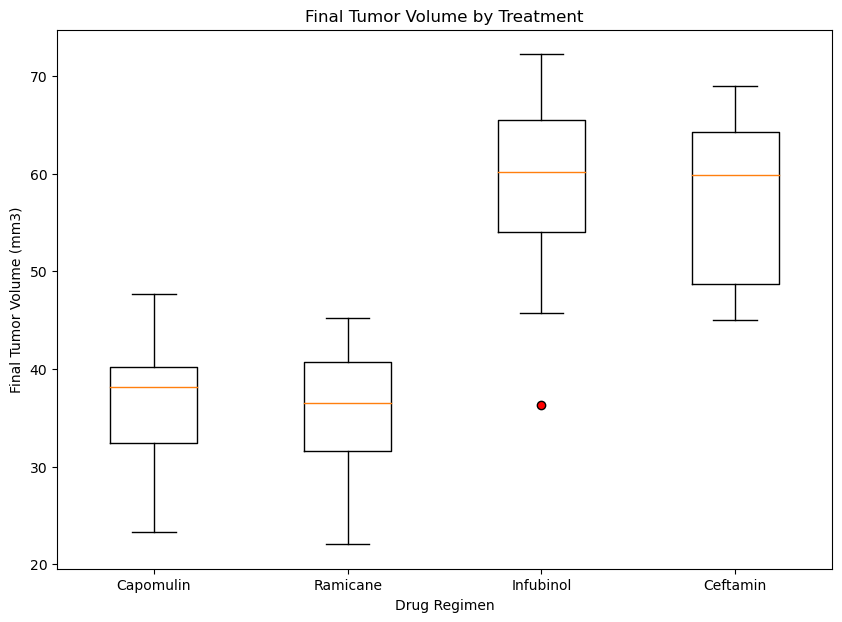

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,7))
plt.boxplot([d["Tumor Volumes"] for d in tumor_vol_data], labels=[d["Treatment"] for d in tumor_vol_data], flierprops=dict(markerfacecolor='r', marker='o'))
plt.title("Final Tumor Volume by Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

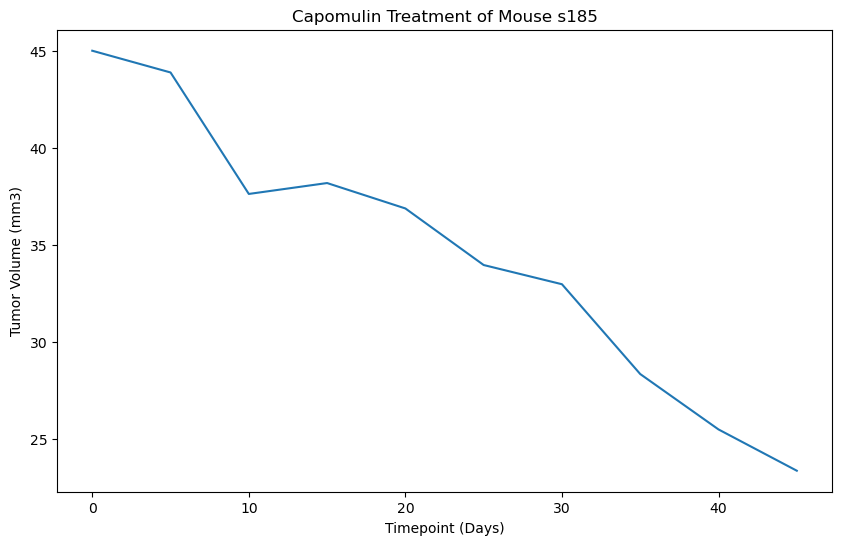

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Selecting a random mouse treated with Capomulin
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == 'Capomulin']
random_mouse = capomulin_data.sample(n=1)["Mouse ID"].values[0]

# Data for this mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == random_mouse]

# Generating a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10,6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"],color="#2077B4")
plt.title(f"Capomulin Treatment of Mouse {random_mouse}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

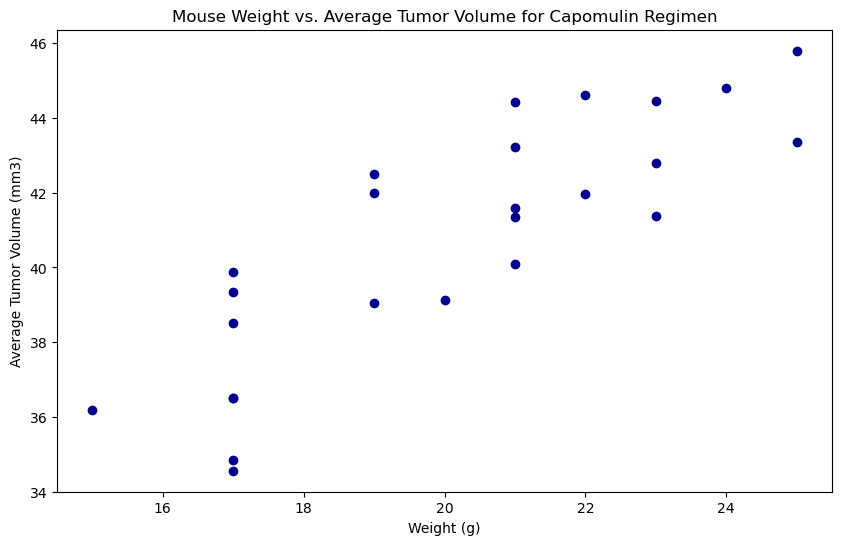

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Grouping Capomulin data by mouse ID and calculating the average tumor volume
average_tumor_vol = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", 
                                                            "Weight (g)": "mean"})

# Generating a scatter plot of mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10,6))
plt.scatter(average_tumor_vol["Weight (g)"], average_tumor_vol["Tumor Volume (mm3)"], color='darkblue', marker = "o")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


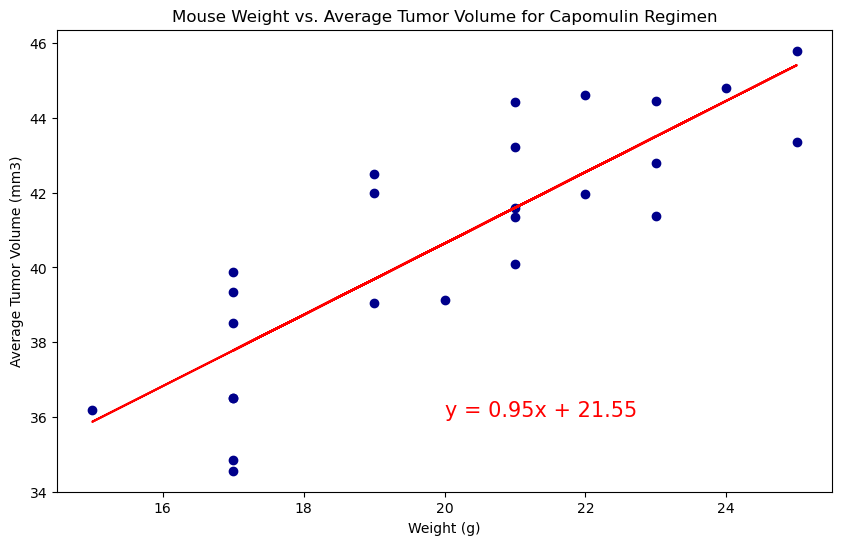

The r-squared is:0.7088568047708723.


In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculating the correlation coefficient
correlation = st.pearsonr(average_tumor_vol["Weight (g)"],average_tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

# Performing a linear regression on mouse weight vs. average tumor volume
(slope, intercept, r_value, p_value, std_err) = linregress(average_tumor_vol["Weight (g)"], average_tumor_vol["Tumor Volume (mm3)"])

# Creating a line equation for the linear regression model
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the linear regression model on top of the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(average_tumor_vol["Weight (g)"], average_tumor_vol["Tumor Volume (mm3)"], 
            color='darkblue', 
            marker = "o")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(average_tumor_vol["Weight (g)"], intercept + slope*average_tumor_vol["Weight (g)"], "r-")
plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.show()

print(f"The r-squared is:{r_value**2}.") 